# Reinforcement Learning Basics

## Introduction

### What is Reinforcement Learning?

Reinforcement Learning (RL) is a*Paradigm* (or technique) in Machine Learning, that allows us to train an *Agent* to complete a task without providing detailed explanations or previous examples of how the task is supposed to be completed. In order to learn, the Agent will attempt to solve the task multiple times, trying out different *Actions* in a given *Environment* and paying attention to what happens afterwards. As the agent *Explores* the environment and the consequences of its actions, it builds up a *Policy* that will guide its actions in the future.

In simpler terms, with RL we can learn to solve a problem by dividing it in sub-problems (or sub-tasks, or steps), trying many times different actions for each step, and remembering how well or bad each one worked. At its core, the learning takes the form of a "memory" where we remember the results of each action at any given step, and which we update with our new experiences. When we think that we have learned enough, we can stop updating this memory and make use of the experience, in order to solve the task effectively.

#### Key Concepts:
- The ***Agent*** is the entity that we are training. It can represent a concrete entity from the real world (for example, a Robot) or something abstract (a player in a Go game).

- The ***Environment*** is where the Agent does its learning. Although it usually remains unchanged, it can also be affected by the actions of the Agent, or even behave in a way that is not deterministic. The Agent will have to learn to deal with this.

- While the Agent explores the Environment, it will need to somehow remember where it is, that is, its ***State***.

- The objective of the Agent is to learn how to complete a Task. Tasks are composed of multiple ***Actions***. Whenever the Agent executes an Action, it will most probably change its State.

- In a given state, there might be multiple possible actions. In order to learn the best possible action for each state, the Agent is given a ***Reward*** every time it executes an action.

- As the explores states, executes actions and receives rewards, it will store all this information inside a ***Policy***.

- But the Agent doesn't try only once to complete the task, it will try multiple times. Each attempt is called an ***Episode***

- As the Agent starts learning, it will not know much about the environment and its rewards. But as the Policy accumulates more information, it will be important to decide where the Agent continues ***Exporing***, or starts  ***Exploiting*** the learnings it has so far.

## First example
We will begin by learning to solve a very simple task: finding the exit to a maze.

Our representation of the maze will be an array of integer values. The meaning of each value is:

* 0: empty space
* 1: wall
* 2: starting position
* 3: maze exit

In [ ]:
DEFAULT_MAZE = [[2,0,0,1,0,3,0,0],
                [0,1,1,1,0,0,0,0],
                [0,1,0,1,0,1,1,1],
                [0,0,0,1,0,0,1,0],
                [0,1,1,1,1,0,1,0],
                [0,0,0,1,0,0,1,0],
                [0,1,0,0,0,1,1,0],
                [0,1,0,1,0,0,0,0],
                ]

In [ ]:
from multiprocessing import Pool

from rl import *
from simplerl import *
from trainer import *

def envBuilder():
    return GridEnvironment(Grid(DEFAULT_MAZE))

trainer = Trainer(envBuilder)
NUM_BATCHES = 50
trainer.batchTrain(numBatches = NUM_BATCHES, numTrainEpisodes = 200, numTestEpisodes = 100, maxSteps = 50, maxProcesses = 8)

100%|██████████| 50/50 [00:02<00:00, 16.94it/s]


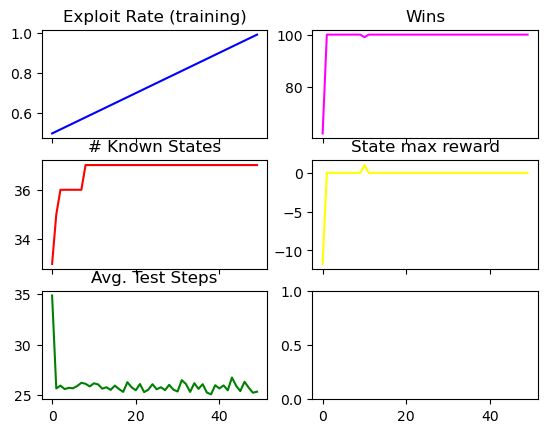

In [2]:
import matplotlib.pyplot as plt

x = range(NUM_BATCHES)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex=True)

ax1.set_title('Exploit Rate (training)')
ax1.plot(x, trainer.eRates, label="Exploit Rate (training)", color='blue')

ax2.set_title('Wins')
ax2.plot(x, trainer.rWins, label='Wins', color='magenta')

ax3.set_title("# Known States")
ax3.plot(x, trainer.nStates, label="Known States", color='red')

ax4.set_title("State max reward")
ax4.plot(x, trainer.stateMaxRewards, label="state max reward", color='yellow')

ax5.set_title("Avg. Test Steps")
ax5.plot(x, trainer.nSteps, label="Avg. Test Steps", color='green')
